<a href="https://colab.research.google.com/github/Savville/2025-design-week-2/blob/main/3D_drawing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating Security Guard House 3D Model...
Building Specifications:
Length: 3.01 m
Width: 2.1 m
Wall Height: 2.7 m
Roof Peak Height: 3.1 m
Wall Thickness: 0.1 m
Slab Thickness: 0.5 m
Door: 0.9m wide x 2.0m high
Windows: 0.66m wide x 0.9m high (sides), 0.65m wide x 0.9m high (front)
Steps: 2 steps, 0.3m depth, 0.15m height each


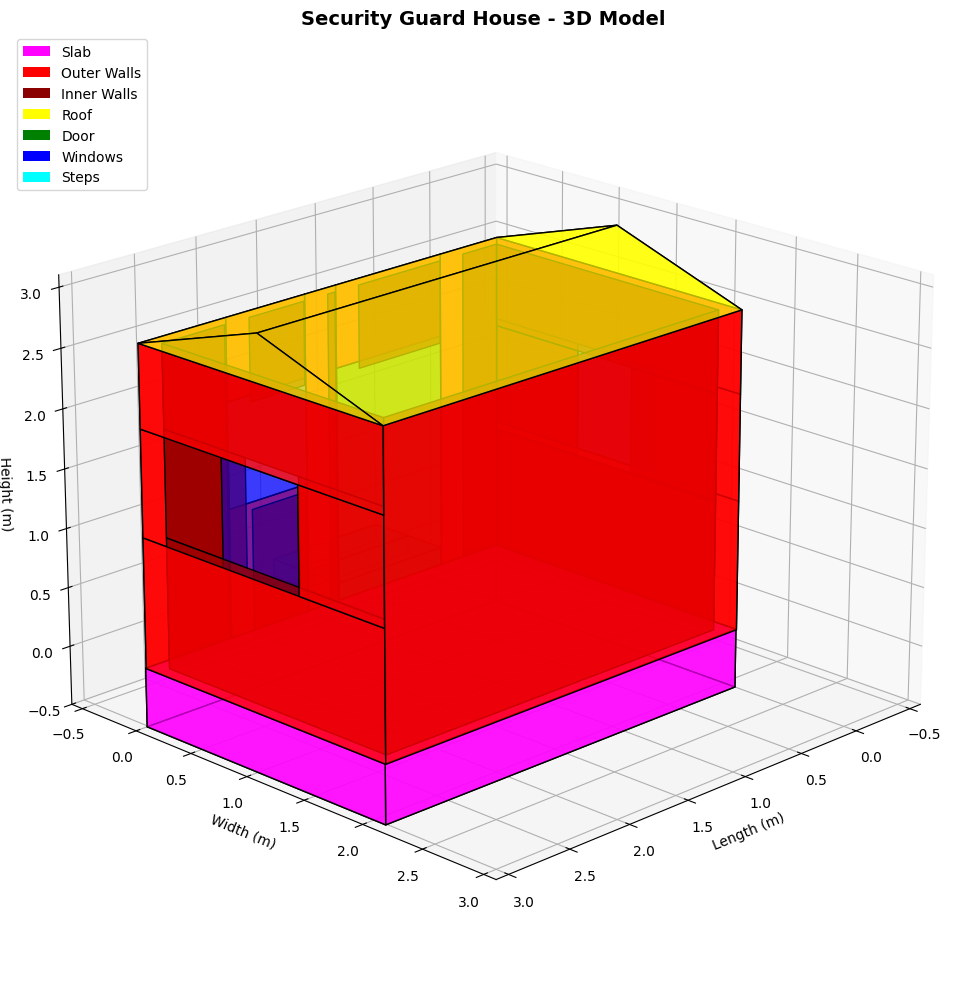

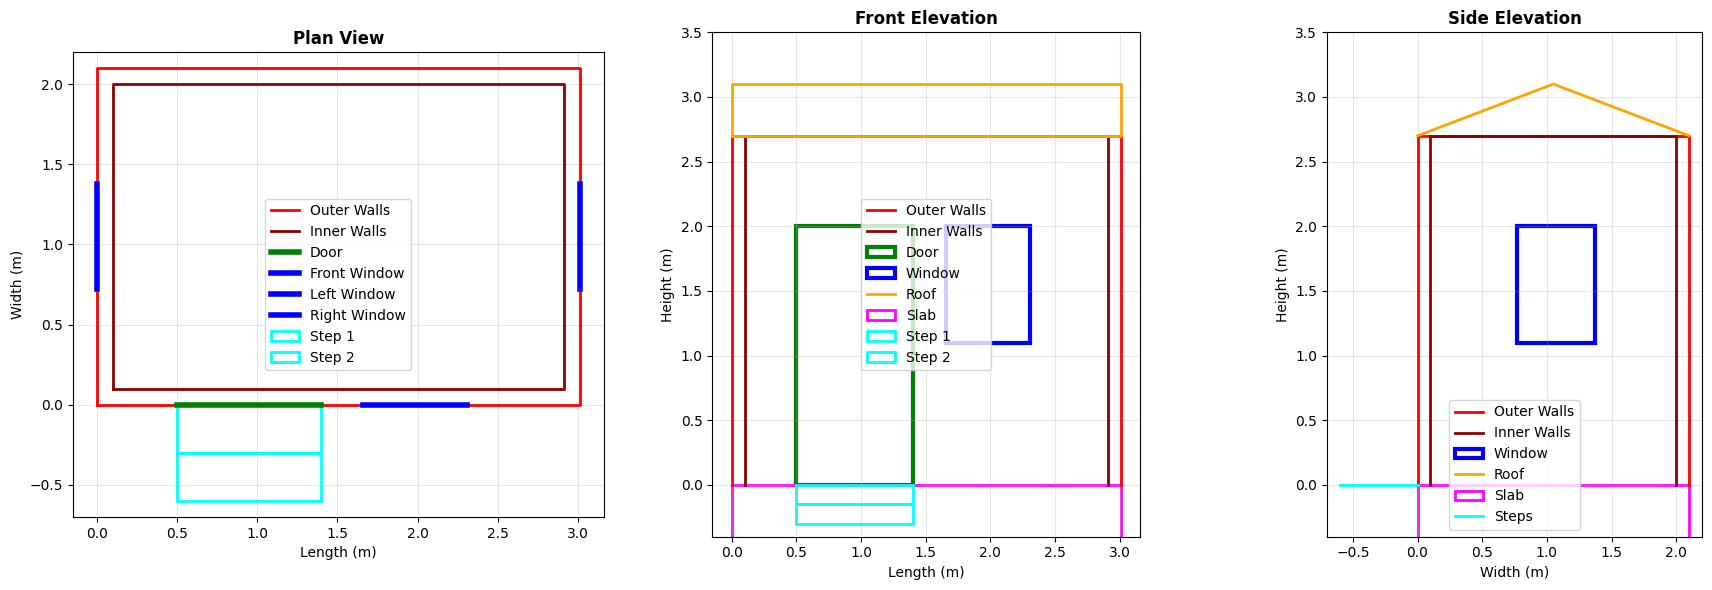


AutoCAD Command Sequence:

LAYER
M WALLS C 1
M DOOR C 3
M WINDOWS C 5
M ROOF C 2
M SLAB C 8
M INNER_WALLS C 13 # A darker shade for inner walls
M STEPS C 14 # Cyan color for steps

LAYER
S SLAB
# Bottom face
LINE 0,0,-0.5 3.01,0,-0.5 3.01,2.1,-0.5 0,2.1,-0.5 C
# Top face
LINE 0,0,0 3.01,0,0 3.01,2.1,0 0,2.1,0 C
# Front face
LINE 0,0,-0.5 3.01,0,-0.5 3.01,0,0 0,0,0 C
# Right face
LINE 3.01,0,-0.5 3.01,2.1,-0.5 3.01,2.1,0 3.01,0,0 C
# Back face
LINE 3.01,2.1,-0.5 0,2.1,-0.5 0,2.1,0 3.01,2.1,0 C
# Left face
LINE 0,2.1,-0.5 0,0,-0.5 0,0,0 0,2.1,0 C


LAYER
S WALLS
LINE 0,0,0 0,0,2.7
LINE 0,2.1,0 0,2.1,2.7
LINE 3.01,0,0 3.01,0,2.7
LINE 3.01,2.1,0 3.01,2.1,2.7
LINE 0,0,2.7 3.01,0,2.7
LINE 0,2.1,2.7 3.01,2.1,2.7
LINE 0,0,2.7 0,2.1,2.7
LINE 3.01,0,2.7 3.01,2.1,2.7

LAYER
S INNER_WALLS
LINE 0.1,0.1,0 0.1,2.0,0
LINE 0.1,0.1,2.7 0.1,2.0,2.7
LINE 2.91,0.1,0 2.91,2.0,0
LINE 2.91,0.1,2.7 2.91,2.0,2.7
LINE 0.1,0.1,0 2.91,0.1,0
LINE 0.1,2.0,0 2.91,2.0,0
LINE 0.1,0.1,2.7 2.91,0.1,2.7
LINE 0.1,2.0,2.7 

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def create_guard_house():
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Define colors for different components (matching AutoCAD layer colors)
    colors = {
        'walls': 'red',      # Color 1
        'roof': 'yellow',    # Color 2
        'door': 'green',     # Color 3
        'windows': 'blue',   # Color 5
        'slab': 'magenta',   # Color 8
        'inner_walls': 'darkred', # A darker shade for inner walls
        'steps': 'cyan' # Color for steps
    }

    # Building dimensions
    length = 3.01  # X direction
    width = 2.1    # Y direction
    wall_height = 2.7
    roof_peak_height = 3.1
    slab_thickness = 0.5 # Updated slab thickness
    wall_thickness = 0.1 # Define wall thickness

    # SLAB (foundation) - Adjusted for thicker slab
    slab_vertices = [
        [0, 0, -slab_thickness], [length, 0, -slab_thickness], [length, width, -slab_thickness], [0, width, -slab_thickness],
        [0, 0, 0], [length, 0, 0], [length, width, 0], [0, width, 0]
    ]
    slab_faces = [
        [slab_vertices[0], slab_vertices[1], slab_vertices[2], slab_vertices[3]], # Bottom
        [slab_vertices[4], slab_vertices[5], slab_vertices[6], slab_vertices[7]], # Top
        [slab_vertices[0], slab_vertices[1], slab_vertices[5], slab_vertices[4]], # Front
        [slab_vertices[1], slab_vertices[2], slab_vertices[6], slab_vertices[5]], # Right
        [slab_vertices[2], slab_vertices[3], slab_vertices[7], slab_vertices[6]], # Back
        [slab_vertices[3], slab_vertices[0], slab_vertices[4], slab_vertices[7]]  # Left
    ]
    ax.add_collection3d(Poly3DCollection(slab_faces, facecolors=colors['slab'], alpha=0.7, edgecolors='black'))


    # WALLS (Outer walls with openings) - Adjusted for slab thickness
    # Front wall (with door and window openings)
    front_wall_segments = [
        # Left segment (0 to 0.5m)
        [[0, 0, 0], [0.5, 0, 0], [0.5, 0, wall_height], [0, 0, wall_height]],
        # Between door and window (1.4 to 1.66m)
        [[1.4, 0, 0], [1.66, 0, 0], [1.66, 0, wall_height], [1.4, 0, wall_height]],
        # Between window and right corner (2.31 to 3.01m)
        [[2.31, 0, 0], [length, 0, 0], [length, 0, wall_height], [2.31, 0, wall_height]],
        # Above door
        [[0.5, 0, 2.0], [1.4, 0, 2.0], [1.4, 0, wall_height], [0.5, 0, wall_height]],
        # Above window
        [[1.66, 0, 2.0], [2.31, 0, 2.0], [2.31, 0, wall_height], [1.66, 0, wall_height]],
        # Below window
        [[1.66, 0, 0], [2.31, 0, 0], [2.31, 0, 1.1], [1.66, 0, 1.1]]
    ]

    for segment in front_wall_segments:
        ax.add_collection3d(Poly3DCollection([segment], facecolors=colors['walls'], alpha=0.8, edgecolors='black'))

    # Back wall (solid)
    back_wall = [[0, width, 0], [length, width, 0], [length, width, wall_height], [0, width, wall_height]]
    ax.add_collection3d(Poly3DCollection([back_wall], facecolors=colors['walls'], alpha=0.8, edgecolors='black'))

    # Left wall (with window opening)
    left_wall_segments = [
        # Bottom section (below window)
        [[0, 0, 0], [0, width, 0], [0, width, 1.1], [0, 0, 1.1]],
        # Above window
        [[0, 0, 2.0], [0, width, 2.0], [0, width, wall_height], [0, 0, wall_height]],
        # Left of window (0 to 0.72m)
        [[0, 0, 1.1], [0, 0.72, 1.1], [0, 0.72, 2.0], [0, 0, 2.0]],
        # Right of window (1.38 to 2.1m)
        [[0, 1.38, 1.1], [0, width, 1.1], [0, width, 2.0], [0, 1.38, 2.0]]
    ]

    for segment in left_wall_segments:
        ax.add_collection3d(Poly3DCollection([segment], facecolors=colors['walls'], alpha=0.8, edgecolors='black'))

    # Right wall (with window opening)
    right_wall_segments = [
        # Bottom section (below window)
        [[length, 0, 0], [length, width, 0], [length, width, 1.1], [length, 0, 1.1]],
        # Above window
        [[length, 0, 2.0], [length, width, 2.0], [length, width, wall_height], [length, 0, wall_height]],
        # Left of window (0 to 0.72m)
        [[length, 0, 1.1], [length, 0.72, 1.1], [length, 0.72, 2.0], [length, 0, 2.0]],
        # Right of window (1.38 to 2.1m)
        [[length, 1.38, 1.1], [length, width, 1.1], [length, width, 2.0], [length, 1.38, 2.0]]
    ]

    for segment in right_wall_segments:
        ax.add_collection3d(Poly3DCollection([segment], facecolors=colors['walls'], alpha=0.8, edgecolors='black'))

    # INNER WALLS (0.1m thickness)
    # Front inner wall segments
    front_inner_wall_segments = [
        # Left segment (0 to 0.5m)
        [[wall_thickness, wall_thickness, 0], [0.5 - wall_thickness, wall_thickness, 0], [0.5 - wall_thickness, wall_thickness, wall_height], [wall_thickness, wall_thickness, wall_height]],
        # Between door and window (1.4 to 1.66m)
        [[1.4 + wall_thickness, wall_thickness, 0], [1.66 - wall_thickness, wall_thickness, 0], [1.66 - wall_thickness, wall_thickness, wall_height], [1.4 + wall_thickness, wall_thickness, wall_height]],
        # Between window and right corner (2.31 to 3.01m)
        [[2.31 + wall_thickness, wall_thickness, 0], [length - wall_thickness, wall_thickness, 0], [length - wall_thickness, wall_thickness, wall_height], [2.31 + wall_thickness, wall_thickness, wall_height]],
        # Above door
        [[0.5 + wall_thickness, wall_thickness, 2.0], [1.4 - wall_thickness, wall_thickness, 2.0], [1.4 - wall_thickness, wall_thickness, wall_height], [0.5 + wall_thickness, wall_thickness, wall_height]],
        # Above window
        [[1.66 + wall_thickness, wall_thickness, 2.0], [2.31 - wall_thickness, wall_thickness, 2.0], [2.31 - wall_thickness, wall_thickness, wall_height], [1.66 + wall_thickness, wall_thickness, wall_height]],
        # Below window
        [[1.66 + wall_thickness, wall_thickness, 0], [2.31 - wall_thickness, wall_thickness, 0], [2.31 - wall_thickness, wall_thickness, 1.1], [1.66 + wall_thickness, wall_thickness, 1.1]]
    ]
    for segment in front_inner_wall_segments:
         ax.add_collection3d(Poly3DCollection([segment], facecolors=colors['inner_walls'], alpha=0.8, edgecolors='black'))

    # Back inner wall (solid)
    back_inner_wall = [[wall_thickness, width - wall_thickness, 0], [length - wall_thickness, width - wall_thickness, 0], [length - wall_thickness, width - wall_thickness, wall_height], [wall_thickness, width - wall_thickness, wall_height]]
    ax.add_collection3d(Poly3DCollection([back_inner_wall], facecolors=colors['inner_walls'], alpha=0.8, edgecolors='black'))

    # Left inner wall segments
    left_inner_wall_segments = [
        # Bottom section (below window)
        [[wall_thickness, wall_thickness, 0], [wall_thickness, width - wall_thickness, 0], [wall_thickness, width - wall_thickness, 1.1], [wall_thickness, wall_thickness, 1.1]],
        # Above window
        [[wall_thickness, wall_thickness, 2.0], [wall_thickness, width - wall_thickness, 2.0], [wall_thickness, width - wall_thickness, wall_height], [wall_thickness, wall_thickness, wall_height]],
        # Left of window (0 to 0.72m)
        [[wall_thickness, wall_thickness, 1.1], [wall_thickness, 0.72 + wall_thickness, 1.1], [wall_thickness, 0.72 + wall_thickness, 2.0], [wall_thickness, wall_thickness, 2.0]],
        # Right of window (1.38 to 2.1m)
        [[wall_thickness, 1.38 - wall_thickness, 1.1], [wall_thickness, width - wall_thickness, 1.1], [wall_thickness, width - wall_thickness, 2.0], [wall_thickness, 1.38 - wall_thickness, 2.0]]
    ]
    for segment in left_inner_wall_segments:
         ax.add_collection3d(Poly3DCollection([segment], facecolors=colors['inner_walls'], alpha=0.8, edgecolors='black'))

    # Right inner wall segments
    right_inner_wall_segments = [
        # Bottom section (below window)
        [[length - wall_thickness, wall_thickness, 0], [length - wall_thickness, width - wall_thickness, 0], [length - wall_thickness, width - wall_thickness, 1.1], [length - wall_thickness, wall_thickness, 1.1]],
        # Above window
        [[length - wall_thickness, wall_thickness, 2.0], [length - wall_thickness, width - wall_thickness, 2.0], [length - wall_thickness, width - wall_thickness, wall_height], [length - wall_thickness, wall_thickness, wall_height]],
        # Left of window (0 to 0.72m)
        [[length - wall_thickness, wall_thickness, 1.1], [length - wall_thickness, 0.72 + wall_thickness, 1.1], [length - wall_thickness, 0.72 + wall_thickness, 2.0], [length - wall_thickness, wall_thickness, 2.0]],
        # Right of window (1.38 to 2.1m)
        [[length - wall_thickness, 1.38 - wall_thickness, 1.1], [length - wall_thickness, width - wall_thickness, 1.1], [length - wall_thickness, width - wall_thickness, 2.0], [length - wall_thickness, 1.38 - wall_thickness, 2.0]]
    ]
    for segment in right_inner_wall_segments:
         ax.add_collection3d(Poly3DCollection([segment], facecolors=colors['inner_walls'], alpha=0.8, edgecolors='black'))


    # DOOR (front wall)
    door_frame = [
        [[0.5, 0, 0], [1.4, 0, 0], [1.4, 0, 2.0], [0.5, 0, 2.0]]
    ]
    ax.add_collection3d(Poly3DCollection(door_frame, facecolors=colors['door'], alpha=0.6, edgecolors='black'))

    # WINDOWS
    # Front window
    front_window = [
        [[1.66, 0, 1.1], [2.31, 0, 1.1], [2.31, 0, 2.0], [1.66, 0, 2.0]]
    ]
    ax.add_collection3d(Poly3DCollection(front_window, facecolors=colors['windows'], alpha=0.5, edgecolors='black'))

    # Left side window
    left_window = [
        [[0, 0.72, 1.1], [0, 1.38, 1.1], [0, 1.38, 2.0], [0, 0.72, 2.0]]
    ]
    ax.add_collection3d(Poly3DCollection(left_window, facecolors=colors['windows'], alpha=0.5, edgecolors='black'))

    # Right side window
    right_window = [
        [[length, 0.72, 1.1], [length, 1.38, 1.1], [length, 1.38, 2.0], [length, 0.72, 2.0]]
    ]
    ax.add_collection3d(Poly3DCollection(right_window, facecolors=colors['windows'], alpha=0.5, edgecolors='black'))

    # ROOF (triangular prism)
    # The peak of the triangular cross-section is at [length/2, width/2, roof_peak_height] in the original pyramid.
    # For a triangular prism with cross-section from the side, the peak will be at [length/2, width, roof_peak_height]
    # The base of the triangle is along the width, at height wall_height.
    # The triangle base is width (2.1m). The peak is at height roof_peak_height.
    # The cross-section runs across the length.

    # Vertices of the triangular prism roof
    # Base vertices at wall_height
    v1 = [0, 0, wall_height]
    v2 = [length, 0, wall_height]
    v3 = [length, width, wall_height]
    v4 = [0, width, wall_height]

    # Peak vertices at roof_peak_height
    v5 = [0, width/2, roof_peak_height]
    v6 = [length, width/2, roof_peak_height]

    roof_faces = [
        # Front face (rectangle)
        [v1, v2, v6, v5],
        # Back face (rectangle)
        [v4, v3, v6, v5],
        # Left face (triangle)
        [v1, v4, v5],
        # Right face (triangle)
        [v2, v3, v6]
    ]

    for face in roof_faces:
        ax.add_collection3d(Poly3DCollection([face], facecolors=colors['roof'], alpha=0.7, edgecolors='black'))

    # STEPS (Two steps at the door)
    step_width = 0.9 # Same width as the door
    step_depth = 0.3 # Depth of each step
    step_height = 0.15 # Height of each step

    # First step
    step1_vertices = [
        [0.5, -step_depth, 0], [1.4, -step_depth, 0], [1.4, 0, 0], [0.5, 0, 0], # Bottom
        [0.5, -step_depth, step_height], [1.4, -step_depth, step_height], [1.4, 0, step_height], [0.5, 0, step_height] # Top
    ]
    step1_faces = [
        [step1_vertices[0], step1_vertices[1], step1_vertices[2], step1_vertices[3]], # Bottom
        [step1_vertices[4], step1_vertices[5], step1_vertices[6], step1_vertices[7]], # Top
        [step1_vertices[0], step1_vertices[1], step1_vertices[5], step1_vertices[4]], # Back
        [step1_vertices[1], step1_vertices[2], step1_vertices[6], step1_vertices[5]], # Right
        [step1_vertices[2], step1_vertices[3], step1_vertices[7], step1_vertices[6]], # Front
        [step1_vertices[3], step1_vertices[0], step1_vertices[4], step1_vertices[7]]  # Left
    ]
    ax.add_collection3d(Poly3DCollection(step1_faces, facecolors=colors['steps'], alpha=0.8, edgecolors='black'))

    # Second step
    step2_vertices = [
        [0.5, -(step_depth*2), 0], [1.4, -(step_depth*2), 0], [1.4, -step_depth, 0], [0.5, -step_depth, 0], # Bottom
        [0.5, -(step_depth*2), step_height], [1.4, -(step_depth*2), step_height], [1.4, -step_depth, step_height], [0.5, -step_depth, step_height] # Top
    ]
    step2_faces = [
        [step2_vertices[0], step2_vertices[1], step2_vertices[2], step2_vertices[3]], # Bottom
        [step2_vertices[4], step2_vertices[5], step2_vertices[6], step2_vertices[7]], # Top
        [step2_vertices[0], step2_vertices[1], step2_vertices[5], step2_vertices[4]], # Back
        [step2_vertices[1], step2_vertices[2], step2_vertices[6], step2_vertices[5]], # Right
        [step2_vertices[2], step2_vertices[3], step2_vertices[7], step2_vertices[6]], # Front
        [step2_vertices[3], step2_vertices[0], step2_vertices[4], step2_vertices[7]]  # Left
    ]
    ax.add_collection3d(Poly3DCollection(step2_faces, facecolors=colors['steps'], alpha=0.8, edgecolors='black'))


    # Set axis properties
    ax.set_xlabel('Length (m)')
    ax.set_ylabel('Width (m)')
    ax.set_zlabel('Height (m)')
    ax.set_title('Security Guard House - 3D Model', fontsize=14, fontweight='bold')

    # Set equal aspect ratio and limits
    max_range = max(length, width, roof_peak_height)
    ax.set_xlim(-step_depth*2, max_range) # Adjust x-limit for steps
    ax.set_ylim(-step_depth*2, max_range) # Adjust y-limit for steps
    ax.set_zlim(-slab_thickness, max_range) # Adjust z-limit for slab

    # Add legend
    legend_elements = [
        plt.Rectangle((0,0),1,1, facecolor=colors['slab'], label='Slab'),
        plt.Rectangle((0,0),1,1, facecolor=colors['walls'], label='Outer Walls'),
        plt.Rectangle((0,0),1,1, facecolor=colors['inner_walls'], label='Inner Walls'),
        plt.Rectangle((0,0),1,1, facecolor=colors['roof'], label='Roof'),
        plt.Rectangle((0,0),1,1, facecolor=colors['door'], label='Door'),
        plt.Rectangle((0,0),1,1, facecolor=colors['windows'], label='Windows'),
        plt.Rectangle((0,0),1,1, facecolor=colors['steps'], label='Steps')
    ]
    ax.legend(handles=legend_elements, loc='upper left')

    # Set viewing angle for better visualization
    ax.view_init(elev=20, azim=45)

    plt.tight_layout()
    return fig

def generate_2d_plans():
    """Generate 2D plan, front, and side views"""
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    length = 3.01
    width = 2.1
    wall_thickness = 0.1
    wall_height = 2.7
    roof_peak_height = 3.1
    slab_thickness = 0.5 # Updated slab thickness
    step_width = 0.9 # Same width as the door
    step_depth = 0.3 # Depth of each step
    step_height = 0.15 # Height of each step


    # PLAN VIEW
    ax1.set_aspect('equal')
    ax1.set_title('Plan View', fontweight='bold')

    # Outer walls
    ax1.plot([0, length, length, 0, 0], [0, 0, width, width, 0], 'r-', linewidth=2, label='Outer Walls')
    # Inner walls
    ax1.plot([wall_thickness, length - wall_thickness, length - wall_thickness, wall_thickness, wall_thickness],
             [wall_thickness, wall_thickness, width - wall_thickness, width - wall_thickness, wall_thickness],
             'darkred', linewidth=2, label='Inner Walls')

    # Door (0.5m from left corner, 0.9m wide)
    ax1.plot([0.5, 1.4], [0, 0], 'g-', linewidth=4, label='Door')

    # Front window (0.7m from right corner, 0.65m wide)
    ax1.plot([1.66, 2.31], [0, 0], 'b-', linewidth=4, label='Front Window')

    # Side windows (0.66m wide, centered)
    window_start = (width - 0.66) / 2
    window_end = window_start + 0.66
    ax1.plot([0, 0], [window_start, window_end], 'b-', linewidth=4, label='Left Window')
    ax1.plot([length, length], [window_start, window_end], 'b-', linewidth=4, label='Right Window')

    # Steps in Plan View
    ax1.add_patch(plt.Rectangle((0.5, -step_depth), step_width, step_depth, fill=False, edgecolor='cyan', linewidth=2, label='Step 1'))
    ax1.add_patch(plt.Rectangle((0.5, -(step_depth*2)), step_width, step_depth, fill=False, edgecolor='cyan', linewidth=2, label='Step 2'))


    ax1.set_xlabel('Length (m)')
    ax1.set_ylabel('Width (m)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_ylim(-(step_depth*2) - 0.1, width + 0.1) # Adjust y-limit for steps


    # FRONT VIEW
    ax2.set_aspect('equal')
    ax2.set_title('Front Elevation', fontweight='bold')

    # Ground line
    ax2.plot([0, length], [-slab_thickness, -slab_thickness], 'k-', linewidth=1) # Adjusted ground line

    # Walls
    ax2.plot([0, 0], [0, wall_height], 'r-', linewidth=2, label='Outer Walls')
    ax2.plot([length, length], [0, wall_height], 'r-', linewidth=2)
    ax2.plot([0, length], [wall_height, wall_height], 'r-', linewidth=2)
    ax2.plot([wall_thickness, wall_thickness], [0, wall_height], 'darkred', linewidth=2, label='Inner Walls')
    ax2.plot([length - wall_thickness, length - wall_thickness], [0, wall_height], 'darkred', linewidth=2)
    ax2.plot([wall_thickness, length - wall_thickness], [wall_height, wall_height], 'darkred', linewidth=2)


    # Door
    ax2.add_patch(plt.Rectangle((0.5, 0), 0.9, 2.0, fill=False, edgecolor='green', linewidth=3, label='Door'))

    # Front window
    ax2.add_patch(plt.Rectangle((1.66, 1.1), 0.65, 0.9, fill=False, edgecolor='blue', linewidth=3, label='Window'))

    # Roof (Front rectangle)
    ax2.plot([0, length, length, 0, 0], [wall_height, wall_height, roof_peak_height, roof_peak_height, wall_height], 'orange', linewidth=2, label='Roof')

    # Slab in Front View
    ax2.add_patch(plt.Rectangle((0, -slab_thickness), length, slab_thickness, fill=False, edgecolor='magenta', linewidth=2, label='Slab'))

    # Steps in Front View
    ax2.add_patch(plt.Rectangle((0.5, -step_height), step_width, step_height, fill=False, edgecolor='cyan', linewidth=2, label='Step 1'))
    ax2.add_patch(plt.Rectangle((0.5, -(step_height*2)), step_width, step_height, fill=False, edgecolor='cyan', linewidth=2, label='Step 2'))


    ax2.set_xlabel('Length (m)')
    ax2.set_ylabel('Height (m)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_ylim(-(step_height*2) - 0.1, 3.5) # Adjusted y-limit for steps and slab


    # SIDE VIEW
    ax3.set_aspect('equal')
    ax3.set_title('Side Elevation', fontweight='bold')

    # Ground line
    ax3.plot([0, width], [-slab_thickness, -slab_thickness], 'k-', linewidth=1) # Adjusted ground line

    # Walls
    ax3.plot([0, 0], [0, wall_height], 'r-', linewidth=2, label='Outer Walls')
    ax3.plot([width, width], [0, wall_height], 'r-', linewidth=2)
    ax3.plot([0, width], [wall_height, wall_height], 'r-', linewidth=2)
    ax3.plot([wall_thickness, wall_thickness], [0, wall_height], 'darkred', linewidth=2, label='Inner Walls')
    ax3.plot([width - wall_thickness, width - wall_thickness], [0, wall_height], 'darkred', linewidth=2)
    ax3.plot([wall_thickness, width - wall_thickness], [wall_height, wall_height], 'darkred', linewidth=2)


    # Side window (0.77m from back, 0.6m width)
    window_start = 0.77
    window_end = window_start + 0.6
    ax3.add_patch(plt.Rectangle((window_start, 1.1), 0.6, 0.9, fill=False, edgecolor='blue', linewidth=3, label='Window'))

    # Roof (Side triangle)
    ax3.plot([0, width/2, width], [wall_height, roof_peak_height, wall_height], 'orange', linewidth=2, label='Roof')

    # Slab in Side View
    ax3.add_patch(plt.Rectangle((0, -slab_thickness), width, slab_thickness, fill=False, edgecolor='magenta', linewidth=2, label='Slab'))

    # Steps in Side View - This view is from the side, so we only see the edge of the steps
    ax3.plot([-step_depth*2, 0], [0, 0], 'cyan', linewidth=2, label='Steps') # Representing the steps as a line from the side


    ax3.set_xlabel('Width (m)')
    ax3.set_ylabel('Height (m)')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    ax3.set_ylim(-(step_height*2) - 0.1, 3.5) # Adjusted y-limit for steps and slab
    ax3.set_xlim(-step_depth*2 - 0.1, width + 0.1) # Adjusted x-limit for steps


    plt.tight_layout()
    return fig

def print_autocad_commands():
    """Print the AutoCAD command sequence"""
    commands = """
AutoCAD Command Sequence:
========================

LAYER
M WALLS C 1
M DOOR C 3
M WINDOWS C 5
M ROOF C 2
M SLAB C 8
M INNER_WALLS C 13 # A darker shade for inner walls
M STEPS C 14 # Cyan color for steps

LAYER
S SLAB
# Bottom face
LINE 0,0,-0.5 3.01,0,-0.5 3.01,2.1,-0.5 0,2.1,-0.5 C
# Top face
LINE 0,0,0 3.01,0,0 3.01,2.1,0 0,2.1,0 C
# Front face
LINE 0,0,-0.5 3.01,0,-0.5 3.01,0,0 0,0,0 C
# Right face
LINE 3.01,0,-0.5 3.01,2.1,-0.5 3.01,2.1,0 3.01,0,0 C
# Back face
LINE 3.01,2.1,-0.5 0,2.1,-0.5 0,2.1,0 3.01,2.1,0 C
# Left face
LINE 0,2.1,-0.5 0,0,-0.5 0,0,0 0,2.1,0 C


LAYER
S WALLS
LINE 0,0,0 0,0,2.7
LINE 0,2.1,0 0,2.1,2.7
LINE 3.01,0,0 3.01,0,2.7
LINE 3.01,2.1,0 3.01,2.1,2.7
LINE 0,0,2.7 3.01,0,2.7
LINE 0,2.1,2.7 3.01,2.1,2.7
LINE 0,0,2.7 0,2.1,2.7
LINE 3.01,0,2.7 3.01,2.1,2.7

LAYER
S INNER_WALLS
LINE 0.1,0.1,0 0.1,2.0,0
LINE 0.1,0.1,2.7 0.1,2.0,2.7
LINE 2.91,0.1,0 2.91,2.0,0
LINE 2.91,0.1,2.7 2.91,2.0,2.7
LINE 0.1,0.1,0 2.91,0.1,0
LINE 0.1,2.0,0 2.91,2.0,0
LINE 0.1,0.1,2.7 2.91,0.1,2.7
LINE 0.1,2.0,2.7 2.91,2.0,2.7

LAYER
S DOOR
LINE 0.5,0,0 0.5,0,2
LINE 1.4,0,0 1.4,0,2
LINE 0.5,0,2 1.4,0,2

LAYER
S WINDOWS
# Front window
LINE 1.66,0,1.1 1.66,0,2.0
LINE 2.31,0,1.1 2.31,0,2.0
LINE 1.66,0,2.0 2.31,0,2.0
LINE 1.66,0,1.1 2.31,0,1.1

# Left side window
LINE 0,0.72,1.1 0,0.72,2.0
LINE 0,1.38,1.1 0,1.38,2.0
LINE 0,0.72,2.0 0,1.38,2.0
LINE 0,0.72,1.1 0,1.38,1.1

# Right side window
LINE 3.01,0.72,1.1 3.01,0.72,2.0
LINE 3.01,1.38,1.1 3.01,1.38,2.0
LINE 3.01,0.72,2.0 3.01,1.38,2.0
LINE 3.01,0.72,1.1 3.01,1.38,1.1

LAYER
S ROOF
# Front roof rectangle
LINE 0,0,2.7 3.01,0,2.7 3.01,0,3.1 0,0,3.1 C
# Back roof rectangle
LINE 0,2.1,2.7 3.01,2.1,2.7 3.01,2.1,3.1 0,2.1,3.1 C
# Left roof triangle
LINE 0,0,2.7 0,2.1,2.7 0,1.05,3.1 C
# Right roof triangle
LINE 3.01,0,2.7 3.01,2.1,2.7 3.01,1.05,3.1 C

LAYER
S STEPS
# First step
LINE 0.5,-0.3,0 1.4,-0.3,0 1.4,0,0 0.5,0,0 C # Bottom
LINE 0.5,-0.3,0.15 1.4,-0.3,0.15 1.4,0,0.15 0.5,0,0.15 C # Top
LINE 0.5,-0.3,0 1.4,-0.3,0 1.4,-0.3,0.15 0.5,-0.3,0.15 C # Back
LINE 1.4,-0.3,0 1.4,0,0 1.4,0,0.15 1.4,-0.3,0.15 C # Right
LINE 1.4,0,0 0.5,0,0 0.5,0,0.15 1.4,0,0.15 C # Front
LINE 0.5,0,0 0.5,-0.3,0 0.5,-0.3,0.15 0.5,0,0.15 C # Left

# Second step
LINE 0.5,-0.6,0 1.4,-0.6,0 1.4,-0.3,0 0.5,-0.3,0 C # Bottom
LINE 0.5,-0.6,0.15 1.4,-0.6,0.15 1.4,-0.3,0.15 0.5,-0.3,0.15 C # Top
LINE 0.5,-0.6,0 1.4,-0.6,0 1.4,-0.6,0.15 0.5,-0.6,0.15 C # Back
LINE 1.4,-0.6,0 1.4,-0.3,0 1.4,-0.3,0.15 1.4,-0.6,0.15 C # Right
LINE 1.4,-0.3,0 0.5,-0.3,0 0.5,-0.3,0.15 1.4,-0.3,0.15 C # Front
LINE 0.5,-0.3,0 0.5,-0.6,0 0.5,-0.6,0.15 0.5,-0.3,0.15 C # Left


ZOOM E
"""
    print(commands)

def main():
    """Main function to generate all views"""
    print("Generating Security Guard House 3D Model...")
    print("=" * 50)

    # Print building specifications
    print("Building Specifications:")
    print(f"Length: 3.01 m")
    print(f"Width: 2.1 m")
    print(f"Wall Height: 2.7 m")
    print(f"Roof Peak Height: 3.1 m")
    print(f"Wall Thickness: 0.1 m")
    print(f"Slab Thickness: 0.5 m") # Added slab thickness
    print(f"Door: 0.9m wide x 2.0m high")
    print(f"Windows: 0.66m wide x 0.9m high (sides), 0.65m wide x 0.9m high (front)")
    print(f"Steps: 2 steps, 0.3m depth, 0.15m height each") # Added step dimensions
    print("=" * 50)

    # Generate 3D model
    fig_3d = create_guard_house()
    plt.show()

    # Generate 2D plans
    fig_2d = generate_2d_plans()
    plt.show()

    # Print AutoCAD commands
    print_autocad_commands()

if __name__ == "__main__":
    main()

# Task
Calculate the volume of concrete, brick, steel, glass, and iron used in the building model based on the provided dimensions and material thicknesses, and generate the formulas used for these calculations.

## Extract dimensions

### Subtask:
Extract the relevant dimensions (length, width, wall height, slab thickness, wall thickness, door dimensions, window dimensions, roof dimensions, step dimensions) from the code.


**Reasoning**:
Extract the relevant dimension variables and their values from the code block.



In [3]:
# Extract dimensions directly from the code
length = 3.01
width = 2.1
wall_height = 2.7
roof_peak_height = 3.1
slab_thickness = 0.5
wall_thickness = 0.1

# Door dimensions (derived from door_frame vertices)
door_width = 1.4 - 0.5
door_height = 2.0 - 0.0

# Front window dimensions (derived from front_window vertices)
front_window_width = 2.31 - 1.66
front_window_height = 2.0 - 1.1

# Side window dimensions (derived from left_window vertices)
side_window_width = 1.38 - 0.72
side_window_height = 2.0 - 1.1

# Step dimensions
step_width = 0.9
step_depth = 0.3
step_height = 0.15

# Print the extracted dimensions
print("Extracted Dimensions:")
print(f"Length: {length} m")
print(f"Width: {width} m")
print(f"Wall Height: {wall_height} m")
print(f"Roof Peak Height: {roof_peak_height} m")
print(f"Slab Thickness: {slab_thickness} m")
print(f"Wall Thickness: {wall_thickness} m")
print(f"Door Dimensions: {door_width:.2f} m wide x {door_height:.2f} m high")
print(f"Front Window Dimensions: {front_window_width:.2f} m wide x {front_window_height:.2f} m high")
print(f"Side Window Dimensions: {side_window_width:.2f} m wide x {side_window_height:.2f} m high")
print(f"Step Dimensions: {step_width:.2f} m wide x {step_depth:.2f} m depth x {step_height:.2f} m high (each step)")

Extracted Dimensions:
Length: 3.01 m
Width: 2.1 m
Wall Height: 2.7 m
Roof Peak Height: 3.1 m
Slab Thickness: 0.5 m
Wall Thickness: 0.1 m
Door Dimensions: 0.90 m wide x 2.00 m high
Front Window Dimensions: 0.65 m wide x 0.90 m high
Side Window Dimensions: 0.66 m wide x 0.90 m high
Step Dimensions: 0.90 m wide x 0.30 m depth x 0.15 m high (each step)


## Calculate slab volume

### Subtask:
Calculate the volume of the concrete slab.


**Reasoning**:
Calculate the volume of the concrete slab using the extracted dimensions and print the result.



In [4]:
# Calculate the volume of the concrete slab
slab_volume = length * width * slab_thickness

# Print the calculated slab volume
print(f"Volume of concrete for the slab: {slab_volume:.2f} m³")

Volume of concrete for the slab: 3.16 m³


## Calculate wall volume

### Subtask:
Calculate the volume of the brick walls, accounting for the openings for the door and windows.


**Reasoning**:
Calculate the total volume of the outer walls and subtract the volumes of the door and window openings to find the net volume of the outer brick walls.



In [5]:
# Calculate the total volume of the outer walls as if they were solid rectangles
# Front and back walls: length * width * wall_height (using wall_thickness for the third dimension)
# Side walls: width * length * wall_height (using wall_thickness for the third dimension)
# Total solid outer wall volume = 2 * (length * wall_thickness * wall_height) + 2 * (width * wall_thickness * wall_height)
# However, the outer walls form a rectangular prism shape with outer dimensions length x width x wall_height, with a thickness of wall_thickness.
# A more accurate way to calculate the solid volume is the volume of the outer box minus the volume of the inner box.
# Outer box volume = length * width * wall_height
# Inner box volume = (length - 2 * wall_thickness) * (width - 2 * wall_thickness) * wall_height
total_solid_outer_wall_volume = (length * width * wall_height) - ((length - 2 * wall_thickness) * (width - 2 * wall_thickness) * wall_height)


# Calculate the volume of the door opening
door_opening_volume = door_width * wall_thickness * door_height

# Calculate the volume of the front window opening
front_window_opening_volume = front_window_width * wall_thickness * front_window_height

# Calculate the volume of each side window opening (there are two)
side_window_opening_volume = side_window_width * wall_thickness * side_window_height
total_side_window_opening_volume = 2 * side_window_opening_volume

# Subtract the volumes of the door and window openings from the total solid wall volume to get the net volume
outer_wall_volume = total_solid_outer_wall_volume - door_opening_volume - front_window_opening_volume - total_side_window_opening_volume

# Print the calculated outer wall volume
print(f"Volume of brick for the outer walls: {outer_wall_volume:.2f} m³")

Volume of brick for the outer walls: 2.29 m³


## Calculate inner wall volume

### Subtask:
Calculate the volume of the inner brick walls.


**Reasoning**:
Calculate the volume of the inner walls by considering them as a rectangular prism with dimensions based on the inner extent of the outer walls and the wall height, then print the result.



In [6]:
# Calculate the volume of the inner walls.
# The inner walls form a rectangular prism inside the outer walls.
# The inner length is length - 2 * wall_thickness
# The inner width is width - 2 * wall_thickness
# The height is wall_height
inner_wall_volume = (length - 2 * wall_thickness) * (width - 2 * wall_thickness) * wall_height

# Print the calculated volume of the inner walls
print(f"Volume of brick for the inner walls: {inner_wall_volume:.2f} m³")

Volume of brick for the inner walls: 14.42 m³


## Calculate door volume

### Subtask:
Calculate the volume of the steel door.


**Reasoning**:
Calculate the volume of the door using the provided dimensions and an assumed thickness, store it in a variable, and print the result.



In [7]:
# Assume a material thickness for the steel door (e.g., 0.05 m)
door_thickness = 0.05

# Calculate the volume of the door
door_volume = door_width * door_height * door_thickness

# Print the calculated door volume
print(f"Volume of steel for the door: {door_volume:.2f} m³")

Volume of steel for the door: 0.09 m³


## Calculate window volume

### Subtask:
Calculate the volume of the glass panes and steel frames in the windows.


**Reasoning**:
Calculate the volume of glass and steel frames for the windows as per the instructions, using assumed material thicknesses.



In [8]:
# Assume material thicknesses for the glass panes and steel frames (e.g., 0.01 m for glass, 0.03 m for frames).
glass_thickness = 0.01
frame_thickness = 0.03
frame_width = 0.05 # Assume a width for the frame around the glass

# Calculate the volume of the glass pane for the front window
front_window_glass_volume = front_window_width * front_window_height * glass_thickness

# Calculate the volume of the steel frame for the front window.
# Assume the frame has a constant width and thickness around the glass pane.
# Calculate its volume by finding the area of the frame (total window area minus glass area) and multiplying by the assumed frame thickness.
front_window_total_area = front_window_width * front_window_height
front_window_glass_area = (front_window_width - 2 * frame_width) * (front_window_height - 2 * frame_width)
front_window_frame_area = front_window_total_area - front_window_glass_area
front_window_frame_volume = front_window_frame_area * frame_thickness

# Calculate the volume of the glass pane for a side window using its dimensions and assumed glass thickness.
side_window_glass_volume = side_window_width * side_window_height * glass_thickness

# Calculate the volume of the steel frame for a side window, using the same approach as the front window frame.
side_window_total_area = side_window_width * side_window_height
side_window_glass_area = (side_window_width - 2 * frame_width) * (side_window_height - 2 * frame_width)
side_window_frame_area = side_window_total_area - side_window_glass_area
side_window_frame_volume = side_window_frame_area * frame_thickness


# Calculate the total volume of glass by summing the volumes of the front and two side window glass panes.
total_glass_volume = front_window_glass_volume + 2 * side_window_glass_volume

# Calculate the total volume of steel for the frames by summing the volumes of the front and two side window steel frames.
total_steel_frame_volume = front_window_frame_volume + 2 * side_window_frame_volume

# Print the calculated total volumes for glass and steel frames, formatted to two decimal places.
print(f"Total volume of glass in windows: {total_glass_volume:.2f} m³")
print(f"Total volume of steel for window frames: {total_steel_frame_volume:.2f} m³")

Total volume of glass in windows: 0.02 m³
Total volume of steel for window frames: 0.01 m³


## Calculate roof volume

### Subtask:
Calculate the volume of the iron sheet roof.


**Reasoning**:
Calculate the volume of the iron sheet roof by first calculating the surface area of the roof and then multiplying it by an assumed thickness. The surface area of the triangular prism roof is the sum of the areas of the front, back, left, and right faces.



In [9]:
# Calculate the volume of the triangular prism roof.
# The roof is a triangular prism with length as the length of the house (3.01 m).
# The triangular cross-section has a base equal to the width (2.1 m) and a height equal to the difference between roof peak height and wall height (3.1 m - 2.7 m = 0.4 m).

# Calculate the height of the triangular cross-section
triangle_height = roof_peak_height - wall_height

# Calculate the area of the triangular cross-section
triangle_area = 0.5 * width * triangle_height

# The roof consists of two rectangular faces (front and back) and two triangular faces (left and right).
# The front and back rectangular faces have dimensions length x slant height of the triangle.
# We need to calculate the slant height of the triangular cross-section.
# The slant height is the hypotenuse of a right-angled triangle with legs equal to width/2 and triangle_height.
slant_height = np.sqrt((width / 2)**2 + triangle_height**2)

# Area of the front and back rectangular faces
rectangular_face_area = length * slant_height

# Area of the left and right triangular faces
triangular_face_area = triangle_area # This is incorrect, the triangular faces are at the ends of the prism along the length

# The triangular faces are on the left and right sides, with base equal to the width (2.1m) and height equal to the slant height calculated above.
# Let's rethink the roof shape based on the vertices defined in create_guard_house:
# v1 = [0, 0, wall_height], v2 = [length, 0, wall_height], v3 = [length, width, wall_height], v4 = [0, width, wall_height] (base vertices at wall_height)
# v5 = [0, width/2, roof_peak_height], v6 = [length, width/2, roof_peak_height] (peak vertices)
# Faces:
# Front face (rectangle): [v1, v2, v6, v5] -> vertices (0,0,2.7), (3.01,0,2.7), (3.01,1.05,3.1), (0,1.05,3.1). This face is not a simple rectangle in the xy plane. It's a trapezoid or quadrilateral in 3D space.
# Back face (rectangle): [v4, v3, v6, v5] -> vertices (0,2.1,2.7), (3.01,2.1,2.7), (3.01,1.05,3.1), (0,1.05,3.1). Similar to the front face.
# Left face (triangle): [v1, v4, v5] -> vertices (0,0,2.7), (0,2.1,2.7), (0,1.05,3.1). This is a triangle in the yz plane.
# Right face (triangle): [v2, v3, v6] -> vertices (3.01,0,2.7), (3.01,2.1,2.7), (3.01,1.05,3.1). This is a triangle in the yz plane.

# Let's calculate the areas of these faces from the vertices.
# Area of Left Triangle (vertices v1, v4, v5):
# v1 = (0, 0, wall_height)
# v4 = (0, width, wall_height)
# v5 = (0, width/2, roof_peak_height)
# This is a triangle in the yz-plane with base along the y-axis (width) and height along the z-axis (triangle_height).
area_left_triangle = 0.5 * width * triangle_height

# Area of Right Triangle (vertices v2, v3, v6):
# v2 = (length, 0, wall_height)
# v3 = (length, width, wall_height)
# v6 = (length, width/2, roof_peak_height)
# This is also a triangle in a plane parallel to the yz-plane.
area_right_triangle = 0.5 * width * triangle_height

# Area of Front Trapezoid (vertices v1, v2, v6, v5):
# v1 = (0, 0, wall_height)
# v2 = (length, 0, wall_height)
# v6 = (length, width/2, roof_peak_height)
# v5 = (0, width/2, roof_peak_height)
# This face has two parallel sides in the x-direction at z=wall_height and z=roof_peak_height.
# Length of side v1-v2 = length
# Length of side v5-v6 = length
# The height of the trapezoid is the slant height we calculated earlier.
area_front_trapezoid = length * slant_height

# Area of Back Trapezoid (vertices v4, v3, v6, v5):
# v4 = (0, width, wall_height)
# v3 = (length, width, wall_height)
# v6 = (length, width/2, roof_peak_height)
# v5 = (0, width/2, roof_peak_height)
# Similar to the front trapezoid.
area_back_trapezoid = length * slant_height

# Total surface area of the roof faces
roof_surface_area = area_left_triangle + area_right_triangle + area_front_trapezoid + area_back_trapezoid

# Assume a thickness for the iron sheet (e.g., 0.002 m)
iron_sheet_thickness = 0.002

# Calculate the volume of the iron sheet
iron_roof_volume = roof_surface_area * iron_sheet_thickness

# Print the calculated volume of iron
print(f"Volume of iron for the roof: {iron_roof_volume:.2f} m³")

Volume of iron for the roof: 0.02 m³


## Calculate step volume

### Subtask:
Calculate the volume of the concrete steps.


**Reasoning**:
Calculate the volume of a single step and then multiply by two for the total concrete step volume.



In [10]:
# Calculate the volume of a single step
single_step_volume = step_width * step_depth * step_height

# Calculate the total volume of concrete for the steps (2 steps)
total_step_volume = 2 * single_step_volume

# Print the calculated total step volume
print(f"Volume of concrete for the steps: {total_step_volume:.2f} m³")

Volume of concrete for the steps: 0.08 m³


## Summarize material volumes

### Subtask:
Sum the volumes for each material (concrete, brick, steel, glass, iron).


**Reasoning**:
Sum the calculated volumes for each material type as per the instructions.



In [11]:
# Sum volumes for each material type

# Concrete: Slab volume + Total step volume
total_concrete_volume = slab_volume + total_step_volume

# Brick: Outer wall volume + Inner wall volume
total_brick_volume = outer_wall_volume + inner_wall_volume

# Steel: Door volume + Total steel frame volume
total_steel_volume = door_volume + total_steel_frame_volume

# Glass: Total glass volume (already calculated)
total_glass_volume = total_glass_volume

# Iron: Iron roof volume (already calculated)
total_iron_volume = iron_roof_volume

# Print the total volumes for each material
print("Total Material Volumes:")
print(f"Concrete: {total_concrete_volume:.2f} m³")
print(f"Brick: {total_brick_volume:.2f} m³")
print(f"Steel: {total_steel_volume:.2f} m³")
print(f"Glass: {total_glass_volume:.2f} m³")
print(f"Iron: {total_iron_volume:.2f} m³")

Total Material Volumes:
Concrete: 3.24 m³
Brick: 16.71 m³
Steel: 0.10 m³
Glass: 0.02 m³
Iron: 0.02 m³


## Generate formulas

### Subtask:
Present the formulas used for each volume calculation and the final summarized volumes.


**Reasoning**:
Define a multiline string variable to store the formulas and final volumes, then print it.



In [12]:
formulas_and_volumes = f"""
Formulas Used for Volume Calculations:
====================================

Slab Volume (Concrete):
Volume = Length x Width x Slab Thickness
Formula: slab_volume = length * width * slab_thickness
Calculated Volume: {slab_volume:.2f} m³

Outer Walls Volume (Brick):
Volume = Total Solid Outer Wall Volume - Door Opening Volume - Front Window Opening Volume - Total Side Window Opening Volume
Total Solid Outer Wall Volume = (Length x Width x Wall Height) - ((Length - 2 * Wall Thickness) x (Width - 2 * Wall Thickness) x Wall Height)
Door Opening Volume = Door Width x Wall Thickness x Door Height
Front Window Opening Volume = Front Window Width x Wall Thickness x Front Window Height
Side Window Opening Volume = Side Window Width x Wall Thickness x Side Window Height
Total Side Window Opening Volume = 2 x Side Window Opening Volume
Formula: outer_wall_volume = total_solid_outer_wall_volume - door_opening_volume - front_window_opening_volume - total_side_window_opening_volume
Calculated Volume: {outer_wall_volume:.2f} m³

Inner Walls Volume (Brick):
Volume = (Inner Length) x (Inner Width) x Wall Height
Inner Length = Length - 2 * Wall Thickness
Inner Width = Width - 2 * Wall Thickness
Formula: inner_wall_volume = (length - 2 * wall_thickness) * (width - 2 * wall_thickness) * wall_height
Calculated Volume: {inner_wall_volume:.2f} m³

Door Volume (Steel):
Volume = Door Width x Door Height x Door Thickness
Formula: door_volume = door_width * door_height * door_thickness
Calculated Volume: {door_volume:.2f} m³

Front Window Glass Volume (Glass):
Volume = Front Window Width x Front Window Height x Glass Thickness
Formula: front_window_glass_volume = front_window_width * front_window_height * glass_thickness
Calculated Volume: {front_window_glass_volume:.2f} m³

Front Window Frame Volume (Steel):
Volume = Front Window Frame Area x Frame Thickness
Front Window Frame Area = (Front Window Width x Front Window Height) - ((Front Window Width - 2 * Frame Width) x (Front Window Height - 2 * Frame Width))
Formula: front_window_frame_volume = front_window_frame_area * frame_thickness
Calculated Volume: {front_window_frame_volume:.2f} m³

Side Window Glass Volume (Glass):
Volume = Side Window Width x Side Window Height x Glass Thickness
Formula: side_window_glass_volume = side_window_width * side_window_height * glass_thickness
Calculated Volume: {side_window_glass_volume:.2f} m³ (per window)

Side Window Frame Volume (Steel):
Volume = Side Window Frame Area x Frame Thickness
Side Window Frame Area = (Side Window Width x Side Window Height) - ((Side Window Width - 2 * Frame Width) x (Side Window Height - 2 * Frame Width))
Formula: side_window_frame_volume = side_window_frame_area * frame_thickness
Calculated Volume: {side_window_frame_volume:.2f} m³ (per window)

Roof Surface Area (for Iron Roof Volume):
Surface Area = Area of Left Triangle + Area of Right Triangle + Area of Front Trapezoid + Area of Back Trapezoid
Area of Triangle = 0.5 x Width x Triangle Height
Triangle Height = Roof Peak Height - Wall Height
Slant Height = sqrt((Width / 2)^2 + Triangle Height^2)
Area of Trapezoid = Length x Slant Height
Formula: roof_surface_area = area_left_triangle + area_right_triangle + area_front_trapezoid + area_back_trapezoid
Calculated Surface Area: {roof_surface_area:.2f} m²

Iron Roof Volume (Iron):
Volume = Roof Surface Area x Iron Sheet Thickness
Formula: iron_roof_volume = roof_surface_area * iron_sheet_thickness
Calculated Volume: {iron_roof_volume:.2f} m³

Single Step Volume (Concrete):
Volume = Step Width x Step Depth x Step Height
Formula: single_step_volume = step_width * step_depth * step_height
Calculated Volume: {single_step_volume:.2f} m³

Total Steps Volume (Concrete):
Volume = 2 x Single Step Volume
Formula: total_step_volume = 2 * single_step_volume
Calculated Volume: {total_step_volume:.2f} m³


Summarized Total Volumes:
=========================
Total Concrete Volume = Slab Volume + Total Steps Volume
Formula: total_concrete_volume = slab_volume + total_step_volume
Total Concrete: {total_concrete_volume:.2f} m³

Total Brick Volume = Outer Walls Volume + Inner Walls Volume
Formula: total_brick_volume = outer_wall_volume + inner_wall_volume
Total Brick: {total_brick_volume:.2f} m³

Total Steel Volume = Door Volume + Total Steel Frame Volume (Front + 2 * Side)
Formula: total_steel_volume = door_volume + total_steel_frame_volume
Total Steel: {total_steel_volume:.2f} m³

Total Glass Volume = Front Window Glass Volume + 2 x Side Window Glass Volume
Formula: total_glass_volume = front_window_glass_volume + 2 * side_window_glass_volume
Total Glass: {total_glass_volume:.2f} m³

Total Iron Volume = Iron Roof Volume
Formula: total_iron_volume = iron_roof_volume
Total Iron: {total_iron_volume:.2f} m³
"""

print(formulas_and_volumes)


Formulas Used for Volume Calculations:

Slab Volume (Concrete):
Volume = Length x Width x Slab Thickness
Formula: slab_volume = length * width * slab_thickness
Calculated Volume: 3.16 m³

Outer Walls Volume (Brick):
Volume = Total Solid Outer Wall Volume - Door Opening Volume - Front Window Opening Volume - Total Side Window Opening Volume
Total Solid Outer Wall Volume = (Length x Width x Wall Height) - ((Length - 2 * Wall Thickness) x (Width - 2 * Wall Thickness) x Wall Height)
Door Opening Volume = Door Width x Wall Thickness x Door Height
Front Window Opening Volume = Front Window Width x Wall Thickness x Front Window Height
Side Window Opening Volume = Side Window Width x Wall Thickness x Side Window Height
Total Side Window Opening Volume = 2 x Side Window Opening Volume
Formula: outer_wall_volume = total_solid_outer_wall_volume - door_opening_volume - front_window_opening_volume - total_side_window_opening_volume
Calculated Volume: 2.29 m³

Inner Walls Volume (Brick):
Volume = (

## Summary:

### Data Analysis Key Findings

*   The total volume of concrete used in the building model (slab and steps) is 3.24 m³.
*   The total volume of brick used for the outer and inner walls is 16.71 m³.
*   The total volume of steel used for the door and window frames is 0.10 m³.
*   The total volume of glass used in the windows is 0.02 m³.
*   The total volume of iron used for the roof is 0.02 m³.

### Insights or Next Steps

*   These calculated volumes can be used for estimating the cost of materials or assessing the weight of the building structure.
*   To increase accuracy, consider using more precise material thicknesses based on building codes or specific product specifications rather than assumed values.
